# Simple Color Tracker

Kevin J. Walchko, created 15 Jan 2017

---

We want to develop a simple image processing routine that will track the a given color through a sequence of images.

In [1]:
%matplotlib inline

In [6]:
from __future__ import print_function
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt
import cv2
import opencvutils as cvu

## Color Space

HSL and HSV are the two most common cylindrical-coordinate representations of points in an RGB color model. The two representations rearrange the geometry of RGB in an attempt to be more intuitive and perceptually relevant than the cartesian (cube) representation. Developed in the 1970s for computer graphics applications, HSL and HSV are used today in color pickers, in image editing software, and less commonly in image analysis and computer vision.

HSV is a cylindrical geometries, with hue, as the angular dimension, starting at the red primary at 0°, passing through the green primary at 120° and the blue primary at 240°, and then wrapping back to red at 360°. In each geometry, the central vertical axis comprises the neutral, achromatic, or gray colors, ranging from black at lightness 0 or value 0, the bottom, to white at lightness 1 or value 1, the top.

| Color Space | use |
|---|---|---|
| RGB | RGB (Red, Green, Blue) describes what kind of light needs to be emitted to produce a given color. Light is added together to create form from darkness. RGB stores individual values for red, green and blue. RGB is not a color space, it is a color model. There are many different RGB color spaces derived from this color model. |
| HSV | HSV (hue, saturation, value), also known as HSB (hue, saturation, brightness), is often used by artists because it is often more natural to think about a color in terms of hue and saturation than in terms of additive or subtractive color components. HSV is a transformation of an RGB colorspace, and its components and colorimetry are relative to the RGB colorspace from which it was derived. |

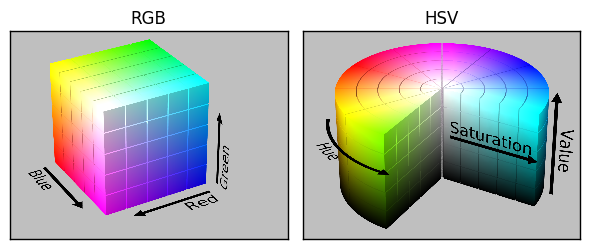

In [51]:
a = cv2.imread('pics/rgb.png')
b = cv2.imread('pics/hsv.png')
cvu.imshow([a,b], titles=['RGB', 'HSV']);

## Color Finder

This thresholds an image between and upper lower HSV bounds. Then uses `erode` and `dilate` (morphological operations) to first remove small false positives and then close holes in the image blob. 

In [52]:
class BallTracker(object):
    # hsv colors to threshold on
    greenLower = (29, 86, 6)
    greenUpper = (64, 255, 255)
    diameter = 6.7  # diameter of average tennis ball in cm

    def __init__(self, lower=(29, 86, 6), upper=(64, 255, 255), diameter=6.7):
        """
        Tracks a ball in an image.
        """
        self.greenLower = lower
        self.greenUpper = upper
        self.diameter = diameter

    def distance(self, radius):
        return self.diameter

    def find(self, frame):
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        # threshold and find the tennis ball
        mask = cv2.inRange(hsv, self.greenLower, self.greenUpper)

        # do some morphological operators to fill in mask gaps and remove
        # outliers (false positives)
        mask = cv2.erode(mask, None, iterations=2)
        mask = cv2.dilate(mask, None, iterations=2)

        # find contours in the mask
        cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]
        center = None
        radius = 0

        # did we find something?
        if len(cnts) > 0:
            # find the largest contour in the mask, then use
            # it to compute the minimum enclosing circle and
            # centroid
            c = max(cnts, key=cv2.contourArea)
            ((x, y), radius) = cv2.minEnclosingCircle(c)

            # only proceed if the radius meets a minimum size
            if radius > 10:
                # find moments -----------
                # M = cv2.moments(c)
                # center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))
                # cv2.circle(frame, center, 5, (0, 0, 255), -1)

                # set center and radius of ball
                center = (int(x), int(y))
                radius = int(radius)

        return center, radius

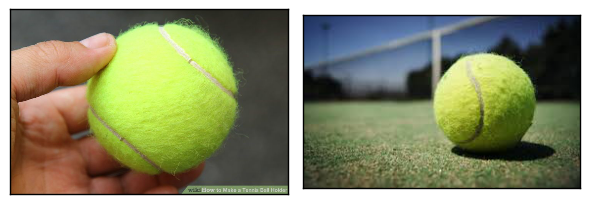

In [53]:
a = cv2.imread('tennis/test6.jpg')
b = cv2.imread('tennis/test3.jpg')
cvu.imshow([a,b]);

In [54]:
bt = BallTracker()

loc = []
for im in [a,b]:
    c, r = bt.find(im)
    cv2.circle(im,c,r,(0,255,0),2)
    cv2.circle(im,c,1,(0,255,0),2)

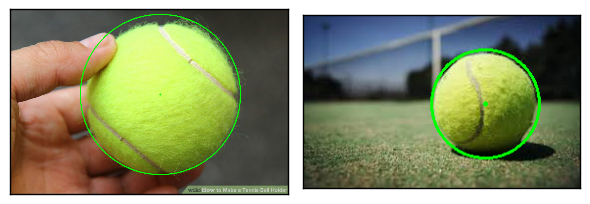

In [55]:
cvu.imshow([a,b]);

# References

- [Wikipedia HSV](https://en.wikipedia.org/wiki/HSL_and_HSV)
- [OpenCV Python documentation](http://docs.opencv.org/trunk/d6/d00/tutorial_py_root.html)
- [List of color spaces and their uses](https://en.wikipedia.org/wiki/List_of_color_spaces_and_their_uses)
- [Website to understand RGB and HSV colors](http://colorizer.org/)

In [56]:
%reload_ext version_information
%version_information numpy, matplotlib, cv2

Software versions
Python 2.7.13 64bit [GCC 4.2.1 Compatible Apple LLVM 8.0.0 (clang-800.0.42.1)]
IPython 5.1.0
OS Darwin 16.3.0 x86_64 i386 64bit
numpy 1.11.3
matplotlib 1.5.3
cv2 3.2.0-dev
Wed Jan 25 20:28:20 2017 MST


-----------

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.